Adapted from [GitHub Keras Example](https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py)


TensorFlow 1.x --> TensorFlow 2.x

# 1. Introduction
The dataset that we will work it is the Cifar10 dataset, a dataset of images from 10 different classes, and we will use a Sequential CNN to identify the class of an image.

This model reaches ~80% accuracy.


In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

print(tf.__version__)

2.8.0


# 2. Data Preprocessing


Classes:
    0. airplane
    1. automobile
    2. bird
    3. cat
    4. deer
    5. dog
    6. frog
    7. horse
    8. ship
    9. truck

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [3]:
y_train = y_train.flatten()
y_test = y_test.flatten()

Run the following code to see how many images are in each class. We see that each class has 5000 images. Having an even distribution of images is helpful for our model as it will have enough images to learn about the features for each class.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[[Text(0, 0, 'airplane'),
  Text(0, 0, 'automobile'),
  Text(0, 0, 'bird'),
  Text(0, 0, 'cat'),
  Text(0, 0, 'deer'),
  Text(0, 0, 'dog'),
  Text(0, 0, 'frog'),
  Text(0, 0, 'horse'),
  Text(0, 0, 'ship'),
  Text(0, 0, 'truck')]]

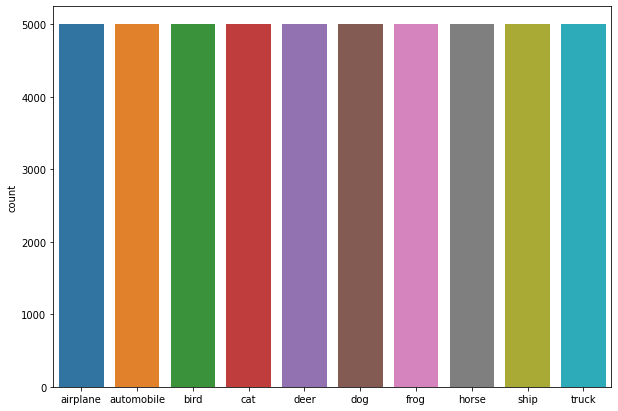

In [4]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,7))
p = sns.countplot(y_train.flatten())
p.set(xticklabels=classes)

## 2.2 Check for NaN Values

In [5]:
np.isnan(x_train).any()

False

In [6]:
np.isnan(x_test).any()

False

There are no NaN values in our dataset. There is no need to preprocess the data to deal with NaN's.

## 2.3 Normalization and Reshaping


In [7]:
input_shape = (32, 32, 3)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test=x_test / 255.0

## 2.4 Label Encoding



In [8]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [9]:
y_train[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)>

## 2.5 Visualize Data

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], shape=(10,), dtype=float32)


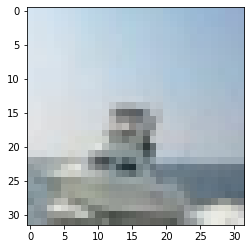

In [10]:
plt.imshow(x_train[100])
print(y_train[100])

The image is an image of a ship. The one-hot encoding vector holds the value of the ship class.


## 3.1 Define the Model


In [11]:
batch_size = 32
num_classes = 10
epochs = 50

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['acc'])


## 3.2 Fit the Training Data

Testing the model on a validation dataset prevents overfitting of the data. We specified a 10% validation and 90% training split.

In [13]:
history = model.fit(x_train, y_train, batch_size=batch_size,
                    epochs=epochs)

Epoch 1/50
1563/1563 [==============================] - 37s 17ms/step - loss: 1.7970 - acc: 0.3401
Epoch 2/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.5016 - acc: 0.4571
Epoch 3/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.3603 - acc: 0.5103
Epoch 4/50
1563/1563 [==============================] - 24s 15ms/step - loss: 1.2680 - acc: 0.5500
Epoch 5/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1962 - acc: 0.5746
Epoch 6/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1269 - acc: 0.6028
Epoch 7/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0820 - acc: 0.6199
Epoch 8/50
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0349 - acc: 0.6338
Epoch 9/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9965 - acc: 0.6497
Epoch 10/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9630 - acc: 0.6628
Epoch 11/

# 4. Evaluate the Model

## 4.1 Loss and Accuracy Curves

Run the following cell to evaluate the loss and accuracy of our model

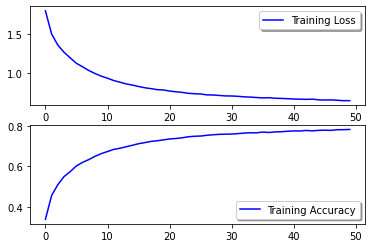

In [14]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

The accuracy increases over time and the loss decreases over time. However, the accuracy of our validation set seems to slightly decrease towards the end even thought our training accuracy increased. Running the model for more epochs might cause our model to be susceptible to overfitting.

## 4.2 Predict Results


In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.7466 - acc: 0.7558


Our model runs pretty well, with an accuracy of ~80% on our testing data.

## 4.3 Confusion Matrix

Run the following cell to compute our confusion matrix using TensorFlow.

In [16]:
# Predict the values from the validation dataset
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

Run the following cell to plot the confusion matrix. We see that our model classifies frogs pretty well, with 900 out of the 1000 frog images heving been classified correctly. We can also see that there is relatively high confusion between cats and dogs.

[[Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')],
 [Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')]]

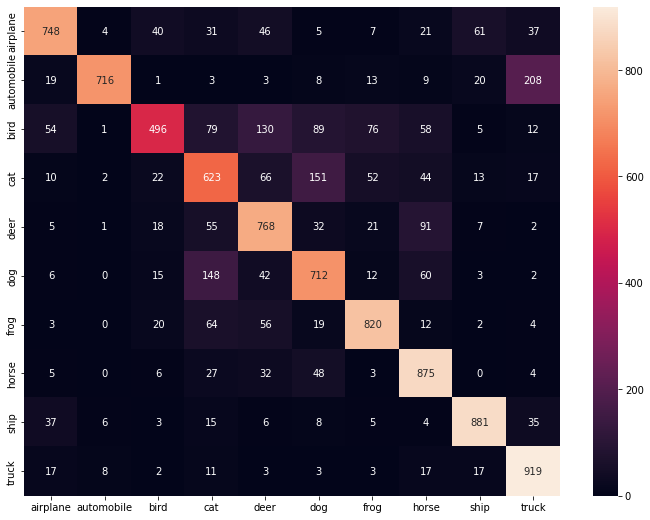

In [17]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=classes, yticklabels=classes)